In [2]:
from networkx.algorithms.community import k_clique_communities, louvain_communities, louvain_partitions
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
import random
import os
import pickle as pkl
from utils import *


In [2]:
#matpltlib dark theme
plt.style.use('dark_background')

In [11]:
# import fb_data as Graph
g = nx.read_edgelist('./fb-data/facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

print(f"Nodes : {len(g.nodes())}")
print(f"Edges : {len(g.edges())}")

Nodes : 4039
Edges : 88234


In [7]:
n = 500
resolution_list = [0, 0.02, 0.25, 3, 5.55]
comm_list = [1, 5, 10, 25, 50]

for i, resolution in enumerate(resolution_list):

    print(resolution, comm_list[i])

    l_comm_ = [1,1,1]
    while len(l_comm_) != comm_list[i]:
        l_comm_ = louvain_dict(g, resolution=resolution)
    # get communities

    print("    Compute centrality...")
    comm_dict_ = comm_dict(g, l_comm_) #get centrality

    print("    Extract central nodes for each community...")
    nb_node = int(50/len(comm_dict_))
    central_dict_ = central_dict(comm_dict_, nb_node=nb_node) #get central nodes

    print("    Begin diffusion...")
    LC_arr, IC_arr = multiple_diffusion(g, central_dict_, n=n)

    print("    Save...")
    with open('arr/LC_arr_' + str(len(comm_dict_)) + '.pkl', 'wb') as f:
        pkl.dump(LC_arr, f)

    with open('arr/IC_arr_' + str(len(comm_dict_)) + '.pkl', 'wb') as f:
        pkl.dump(IC_arr, f)
    
    print(" --------------------------------")


0 1
Nb comm :  1
4039, 

    Compute centrality...
    Extract central nodes for each community...
degree 50
closeness 50
betweenness 50
eigenvector 50
    Begin diffusion...
    Save...
 --------------------------------
0.02 5
Nb comm :  5
341, 1404, 788, 752, 754, 

    Compute centrality...
    Extract central nodes for each community...
degree 50
closeness 50
betweenness 50
eigenvector 50
    Begin diffusion...
    Save...
 --------------------------------
0.25 10
Nb comm :  11
341, 38, 761, 544, 206, 548, 515, 562, 226, 237, 61, 

Nb comm :  10
344, 543, 38, 763, 515, 206, 548, 785, 237, 60, 

    Compute centrality...
    Extract central nodes for each community...
degree 50
closeness 50
betweenness 50
eigenvector 50
    Begin diffusion...
    Save...
 --------------------------------
3 25
Nb comm :  27
341, 249, 125, 151, 325, 166, 38, 254, 52, 25, 206, 106, 19, 22, 6, 226, 455, 20, 73, 232, 209, 218, 21, 285, 19, 137, 59, 

Nb comm :  25
343, 38, 330, 246, 324, 167, 10, 89, 206

/tmp/ipykernel_23153/3304941505.py:13: RuntimeWarning: Mean of empty slice
  dict_LC_arr_mean[c] = np.nanmean(dict_LC_arr[c], axis=0)


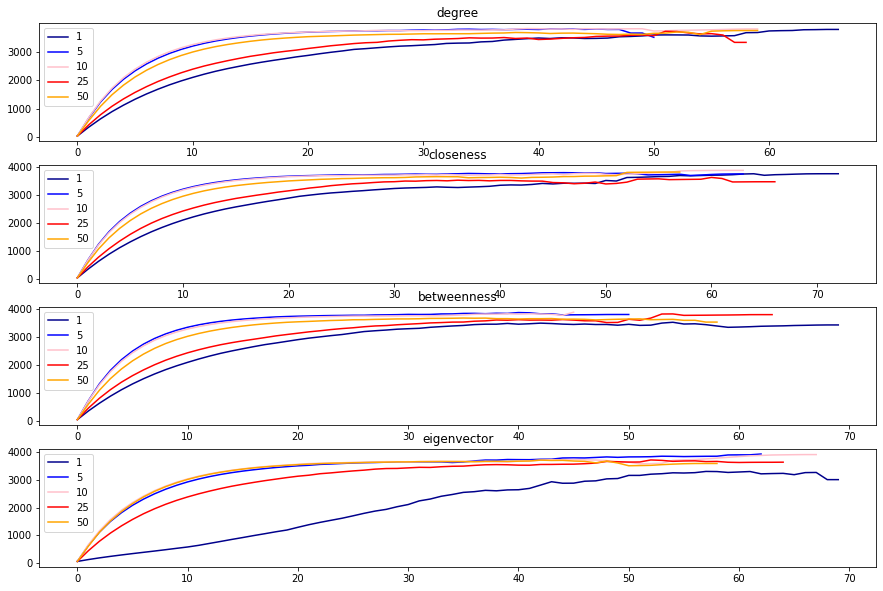

In [11]:
centralitys = ['degree', 'closeness', 'betweenness', 'eigenvector']
comm_len = [1, 5, 10, 25, 50]
color = ['darkblue', 'blue', 'pink', 'red', 'orange']

# Plot a figure with 4 subplots
fig, axes = plt.subplots(4, figsize=(15, 10))

dict_LC_arr = {}
dict_LC_arr_mean = {}
for c in comm_len:
    with open('./arr/LC_arr_' + str(c) + '.pkl', 'rb') as f:
        dict_LC_arr[c] = pkl.load(f)
    dict_LC_arr_mean[c] = np.nanmean(dict_LC_arr[c], axis=0)


#var_LC_arr = np.nanvar(LC_arr, axis=0)  / np.sum(np.invert(np.isnan(LC_arr)), axis=0)
#var_LC_arr[var_LC_arr > 1000] = 1000

for i, centrality in enumerate(centralitys):
    for j, c in enumerate(comm_len):
        #plot mean and variance of LC
        axes[i].plot(dict_LC_arr_mean[c][i], color=color[j])

        #axes[i].fill_between(np.arange(mean_LC_arr.shape[1]), mean_LC_arr[i] - var_LC_arr[i], mean_LC_arr[i] + var_LC_arr[i], color='red', alpha=0.1)
    axes[i].legend(comm_len)
    axes[i].set_title(centrality)


/tmp/ipykernel_17303/2049755891.py:13: RuntimeWarning: Mean of empty slice
  dict_LC_arr_mean[c] = np.nanmean(dict_LC_arr[c], axis=0)


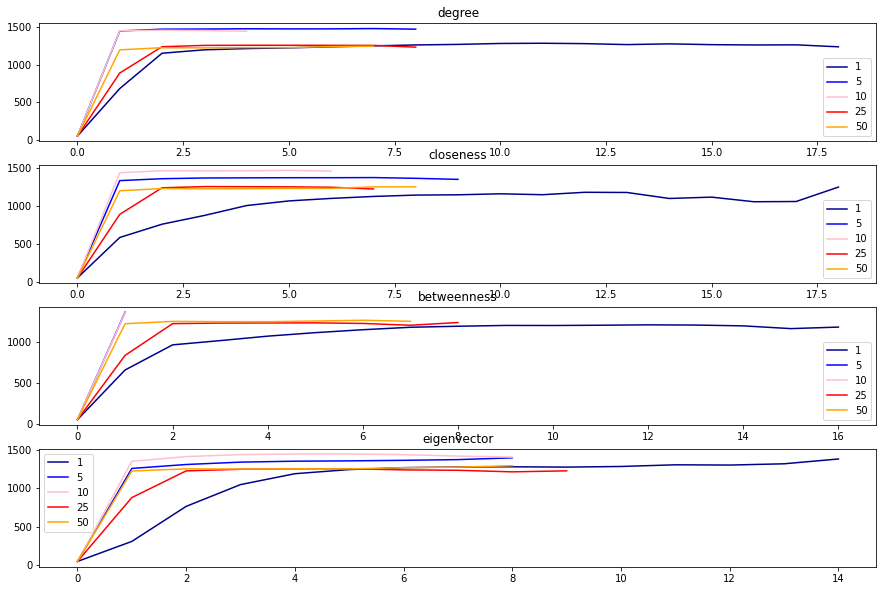

In [3]:
centralitys = ['degree', 'closeness', 'betweenness', 'eigenvector']
comm_len = [1, 5, 10, 25, 50]
color = ['darkblue', 'blue', 'pink', 'red', 'orange']

# Plot a figure with 4 subplots
fig, axes = plt.subplots(4, figsize=(15, 10))

dict_LC_arr = {}
dict_LC_arr_mean = {}
for c in comm_len:
    with open('./arr/IC_arr_' + str(c) + '.pkl', 'rb') as f:
        dict_LC_arr[c] = pkl.load(f)
    dict_LC_arr_mean[c] = np.nanmean(dict_LC_arr[c], axis=0)


#var_LC_arr = np.nanvar(LC_arr, axis=0)  / np.sum(np.invert(np.isnan(LC_arr)), axis=0)
#var_LC_arr[var_LC_arr > 1000] = 1000

for i, centrality in enumerate(centralitys):
    for j, c in enumerate(comm_len):
        #plot mean and variance of LC
        axes[i].plot(dict_LC_arr_mean[c][i], color=color[j])

        #axes[i].fill_between(np.arange(mean_LC_arr.shape[1]), mean_LC_arr[i] - var_LC_arr[i], mean_LC_arr[i] + var_LC_arr[i], color='red', alpha=0.1)
    axes[i].legend(comm_len)
    axes[i].set_title(centrality)

In [11]:
import time

t = []

n = 500
resolution_list = [0, 0.02, 0.25, 3, 5.55]
comm_list = [1, 5, 10, 25, 50]

for i, resolution in enumerate(resolution_list):

    print(resolution, comm_list[i])
    l_comm_ = louvain_dict(g, resolution=resolution)
    a = time.time()
    comm_dict(g, l_comm_)
    b = time.time() - a
    print(comm_list[i], " : ", b)
    t.append(b)

print(b)

0 1
Nb comm :  1
4039, 

1  :  727.4529893398285
0.02 5
Nb comm :  5
341, 754, 788, 752, 1404, 

5  :  178.51727843284607
0.25 10
Nb comm :  9
350, 542, 764, 38, 206, 779, 752, 548, 60, 

10  :  114.4183611869812
3 25
Nb comm :  26
341, 264, 178, 316, 166, 38, 10, 338, 25, 52, 206, 6, 226, 452, 22, 19, 20, 227, 234, 219, 73, 19, 316, 136, 76, 60, 

25  :  48.14943838119507
5.55 50
Nb comm :  51
271, 63, 10, 245, 72, 81, 70, 14, 150, 81, 94, 125, 94, 38, 10, 223, 88, 29, 205, 8, 1, 157, 1, 32, 6, 211, 22, 21, 238, 19, 194, 35, 82, 28, 47, 53, 20, 10, 66, 51, 1, 151, 5, 36, 1, 19, 76, 42, 238, 144, 61, 

50  :  23.878224849700928
23.878224849700928


In [13]:
print(t)

[727.4529893398285, 178.51727843284607, 114.4183611869812, 48.14943838119507, 23.878224849700928]


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time
from utils import *

#load grapg
g = nx.read_edgelist('./fb-data/facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

In [17]:
resolution_list = [0, 0.02, 0.25, 3, 5.55]
comm_list = [1, 5, 10, 25, 50]

degree_time_list = []
closeness_time_list = []
betweenness_time_list = []
eigenvector_time_list = []

for i, resolution in enumerate(resolution_list):
    l_comm_ = [1,1,1]
    while len(l_comm_) != comm_list[i]:
        l_comm_ = louvain_dict(g, resolution=resolution)
    

    comm_dict_ = comm_dict(g, l_comm_) #get centrality


    degree_time = time.time()
    for comm in l_comm_:
        list_comm = list(comm)
        tmp = nx.degree_centrality(g.subgraph(list_comm))
    degree_time_list.append(time.time() - degree_time)

    degree_time = time.time()
    for comm in l_comm_:
        list_comm = list(comm)
        closeness_time = time.time()
        tmp = list(nx.closeness_centrality(g.subgraph(list_comm)).values())
    closeness_time_list.append(time.time() - closeness_time)

    degree_time = time.time()
    for comm in l_comm_:
        list_comm = list(comm)
        betweenness_time = time.time()
        tmp = list(nx.betweenness_centrality(g.subgraph(list_comm)).values())
    betweenness_time_list.append(time.time() - betweenness_time)

    degree_time = time.time()
    for comm in l_comm_:
        list_comm = list(comm)
        eigenvector_time = time.time()
        tmp = list(nx.eigenvector_centrality(g.subgraph(list_comm)).values())
    eigenvector_time_list.append(time.time() - eigenvector_time)

Nb comm :  1
4039, 

Nb comm :  5
350, 1404, 779, 752, 754, 

Nb comm :  10
341, 735, 38, 571, 206, 788, 515, 237, 548, 60, 

Nb comm :  26
341, 181, 166, 328, 224, 38, 117, 73, 254, 25, 51, 206, 226, 6, 22, 19, 455, 19, 273, 172, 235, 274, 118, 137, 19, 60, 

Nb comm :  24
341, 317, 38, 221, 167, 122, 209, 239, 89, 206, 286, 6, 22, 19, 455, 226, 232, 73, 225, 223, 106, 137, 19, 61, 

Nb comm :  25
341, 218, 317, 38, 125, 167, 207, 254, 25, 51, 206, 456, 226, 6, 22, 19, 73, 235, 172, 273, 286, 138, 105, 19, 60, 

Nb comm :  51
10, 16, 246, 47, 270, 72, 99, 7, 121, 97, 90, 150, 39, 38, 94, 10, 223, 88, 206, 1, 19, 85, 178, 33, 22, 193, 225, 158, 15, 1, 30, 9, 66, 1, 83, 17, 151, 50, 53, 35, 19, 22, 42, 14, 29, 137, 76, 42, 230, 19, 61, 

Nb comm :  52
273, 10, 63, 10, 65, 16, 197, 94, 125, 94, 72, 85, 149, 78, 38, 223, 90, 29, 205, 248, 157, 1, 8, 23, 193, 33, 82, 19, 193, 82, 34, 36, 37, 1, 1, 66, 1, 38, 18, 21, 20, 151, 39, 7, 35, 76, 14, 230, 42, 137, 19, 61, 

Nb comm :  51
10, 236,

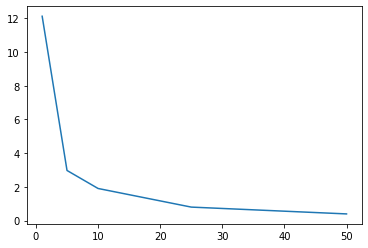

In [28]:
t = np.array([727.4529893398285, 178.51727843284607, 114.4183611869812, 48.14943838119507, 23.878224849700928])
c = np.array([1, 5, 10, 25, 50])


plt.plot(c, t/60)

Text(0.5, 1.0, 'Eigenvector')

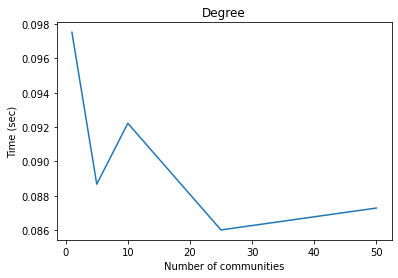

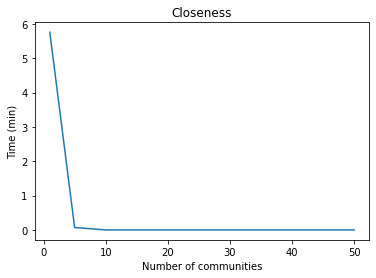

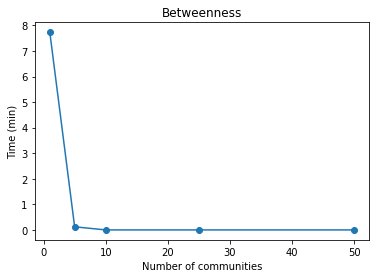

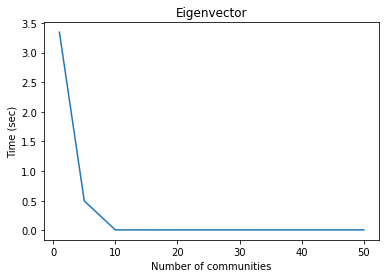

In [31]:
t = np.array([727.4529893398285, 178.51727843284607, 114.4183611869812, 48.14943838119507, 23.878224849700928])
c = np.array([1, 5, 10, 25, 50])

plt.figure()
plt.plot(c, np.array(degree_time_list))
plt.xlabel("Number of communities")
plt.ylabel("Time (sec)")
plt.title("Degree")

plt.figure()
plt.plot(c, np.array(closeness_time_list)/60)
plt.xlabel("Number of communities")
plt.ylabel("Time (min)")
plt.title("Closeness")

plt.figure()
plt.plot(c, np.array(betweenness_time_list)/60, '-o')
plt.xlabel("Number of communities")
plt.ylabel("Time (min)")
plt.title("Betweenness")


plt.figure()
plt.plot(c, np.array(eigenvector_time_list))
plt.xlabel("Number of communities")
plt.ylabel("Time (sec)")
plt.title("Eigenvector")